Question 1 Task 5: Search Algorithms completed for 20 samples:
Linear Search: 132 milliseconds, 2,714,508 comparisons
Sentinel Search: 181 milliseconds, 2,714,508 comparisons
Binary Search (Unsorted): 528 milliseconds, 357 comparisons
Ternary Search (Unsorted): 512 milliseconds, 214 comparisons
Binary Search (Presorted): 49 milliseconds, 357 comparisons
Ternary Search (Presorted): 54 milliseconds, 238 comparisons


,method,iteration,comparisons
0,Linear Search,0,157265
1,Linear Search,1,141425
2,Linear Search,2,161364
3,Linear Search,3,115931
4,Linear Search,4,304191
...,...,...,...
115,Ternary Search (Presorted),15,13
116,Ternary Search (Presorted),16,10
117,Ternary Search (Presorted),17,12
118,Ternary Search (Presorted),18,12


,method,iteration,duration_µs
0,Linear Search,0,7953
1,Linear Search,1,6617
2,Linear Search,2,8020
3,Linear Search,3,5686
4,Linear Search,4,14947
...,...,...,...
115,Ternary Search (Presorted),15,2888
116,Ternary Search (Presorted),16,2931
117,Ternary Search (Presorted),17,2941
118,Ternary Search (Presorted),18,2739


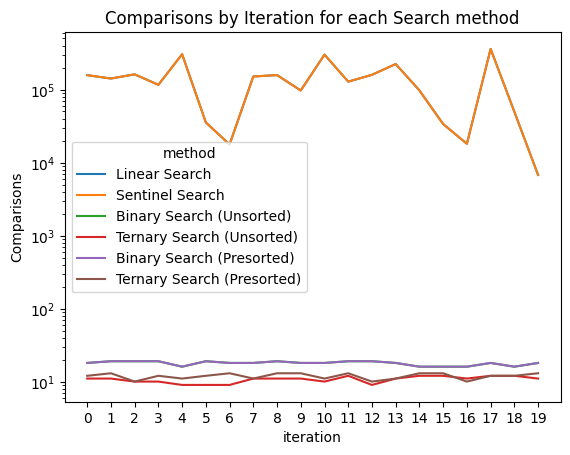

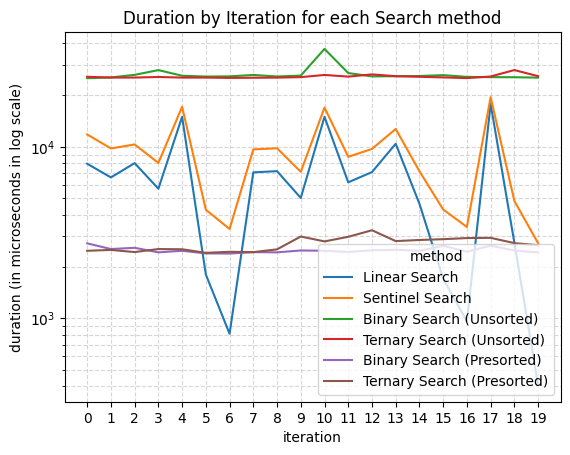

,method,mean comparisons,mean duration (in microseconds)
0,Binary Search (Presorted),17.85,2490.65
1,Binary Search (Unsorted),17.85,26441.20
2,Linear Search,135725.40,6600.15
3,Sentinel Search,135725.40,9054.65
4,Ternary Search (Presorted),11.90,2705.30
5,Ternary Search (Unsorted),10.70,25639.40


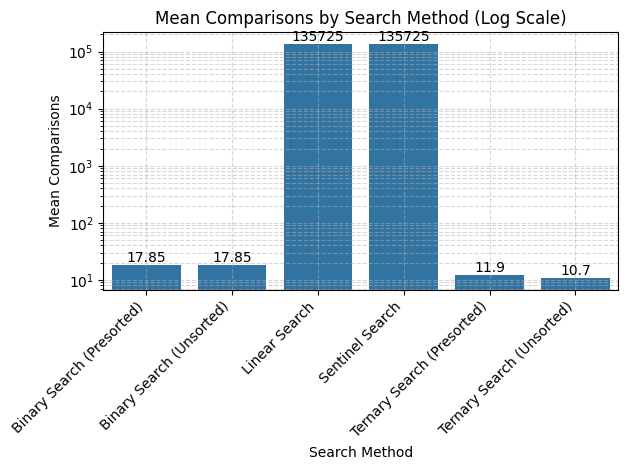

Comparisons Observations:
The difference in the quantity of comparisons between Linear/Sentinel
search and Binary/Ternary search is so extreme, in order to visualize
both effectively we need to look in a logarithmic scale. With this
particular sample dataset, even though the data wasn't sorted as part
of the operation, the dictionary came presorted. For Linear/Sentinel
search, this means that the further along in the alphabet that the
first letter of the search word is, the longer that the
Linear/Sentinel searches must search before they find the result. This
mitigates most of the advantage of Linear/Sentinel searches, namely
that they search against unordered data where placement of the search
object is random. This nuance could be clearer if the brute-force
algorithms were tested against a sorted vs shuffled dictionary. The
results may be improved for linear/sentinel search within a shuffled
dictionary as the chances of finding words with a starting letter
further along the alphabet 

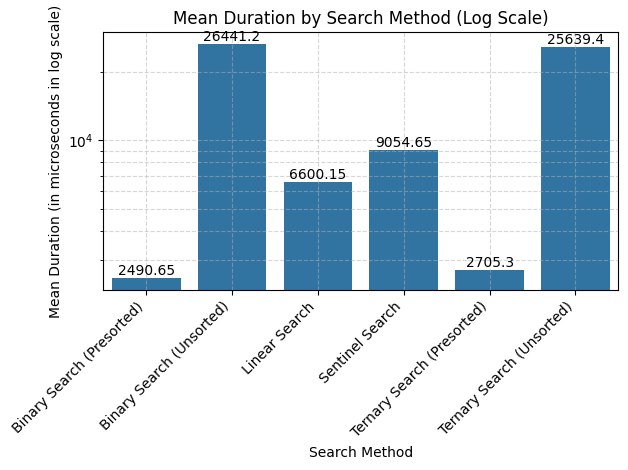

Duration Observations:
As these operations are quite fast, for clarity of duration we are
evaluating the duration in microseconds. This is 1,000,000th of a
second. Just as with the comparisons, the results of duration are
greatly varied between the algorithms. This time, however, the
constant laggard is the (unsorted) Binary/Ternary search. The sort
operation is so time intensive that it greatly raises the mean
duration across all operations. Consistently in second place are the
Linear/Sentinel searches. Linear searches perform slightly better than
the Sentinel search. This is likely due to the small time necessary to
add the search word to the end of the set searched against. As all
search words were derived from the search set, we never searched for a
word that was not present in the search set. This negates the main
advantage of Sentinel search - that it does not need to perform the
boundary check. This analysis might make that advantage clearer if one
or more search words were know

,method,comparisons,duration_µs
0,2D Search,9305.1,489.7
1,Linear Search,201495.4,10172.0


Observations:
On average, it is clear that the 2D search method results in fewer
comparisons and a shorter search duration. The heavy lifting was done
during the initialization of the 2D array, where the larger dataset
was segmented into up to 26 buckets.  This results in a smaller search
area, similar to binary/ternary search. With a smaller search area,
each search was faster with fewer comparisons. A similar process
called 'Full-Text Indexing' is often used to optimize word-based
searching of large blobs of text by sorting words found within a text,
and indexing their placement. Expanding this methodology beyond the
first letter and placing nested arrays by letter may be an improvement
over the ternary search. The difficulty of search is then only as hard
as the number of letters in the search word. For large enough word
libraries, this method might be an improvement on the binary/ternary
search.
Code can be found at https://colab.research.google.com/drive/1gvPP7SG-P9vtRSJYALxqOtBLw

In [ ]:
#Code submitted by Joel Vinas
import requests                 #Used to import file directly from the web
import io                       #Used to import file directly from the web
import numpy as np              #Used to work with math functions
import pandas as pd             #Used to work with data frames
from datetime import datetime   #Used to determine Now()
from datetime import timedelta  #Used to sum timedeltas
import random                   #Used to generate a random number
import matplotlib.pyplot as plt #Used to generate plots
import seaborn as sns           #Used to generate aesthetic plots
import textwrap as tw           #Used to wrap text

#Import the file directly from the web
url = 'https://raw.githubusercontent.com/joelvinas/COMP-SCI_5501/aa4391ae9d3f2cb73e89f3b1fd5bc86bfe34fe2b/Assignment2/Data/words_alpha.txt'
response = requests.get(url)

response.raise_for_status()
if response.status_code == 200:
  dictionary = response.text.splitlines()
else:
  print(f"Error: {response.status_code}")
  exit()

class Treatment:
  iteration = 0
  random_word = ""
  starttime = ""
  endtime = ""
  def __init__(self, iteration, random_word, starttime):
    self.iteration = iteration
    self.random_word = random_word
    self.starttime = starttime
    self.comparisons = 0

  def duration(self):
    return self.endtime - self.starttime

class SearchTools:
  linear_results = []
  sentinel_results = []
  binary_results = []
  binary_sorted_results = []
  ternary_results = []
  ternary_sorted_results = []

  def SearchDuration(self, results):
    curSearchDuration = timedelta(0)
    for curIteration in results:
      curSearchDuration += curIteration.duration()
    SearchMilliseconds = int((curSearchDuration.total_seconds() - int(curSearchDuration.total_seconds())) * 1000)
    return SearchMilliseconds

  def SearchComparisons(self, results):
    totalComparisons = 0
    for curIteration in results:
      totalComparisons += curIteration.comparisons
    return totalComparisons

  def getRandomWord(self, dictionary):
    random_int = random.randint(1, len(dictionary))
    return dictionary[random_int]

  def linear_search(self, index, dictionary, random_word):
    starttime = datetime.now()
    comparisons = 1
    wordIsFound = False
    curTreatment = Treatment(index, random_word, starttime)
    for curWord in dictionary:
      if curWord == random_word:
        curTreatment.endtime = datetime.now()
        wordIsFound = True
        break
      else:
        comparisons += 1
    if not wordIsFound:
      curTreatment.endtime = datetime.now()
    curTreatment.comparisons = comparisons
    return curTreatment

  def sentinel_search(self, index, dictionary, random_word):
    starttime = datetime.now()
    comparisons = 1
    wordIsFound = False
    sentinel_dictionary = dictionary.copy()
    sentinel_dictionary.append(random_word)
    curTreatment = Treatment(index, random_word, starttime)

    for curWord in sentinel_dictionary:
      if curWord == random_word:
        curTreatment.endtime = datetime.now()
        wordIsFound = True
        break
      else:
        comparisons += 1
    #If the word is never found
    if not wordIsFound:
      curTreatment.endtime = datetime.now()
    curTreatment.comparisons = comparisons
    return curTreatment

  def binary_search(self, index, dictionary, random_word, presorted=False):
    starttime = datetime.now()
    comparisons = 1
    wordIsFound = False
    binary_dictionary = dictionary.copy()
    if not presorted:
      binary_dictionary.sort()
    curTreatment = Treatment(index, random_word, starttime)

    begining = 0
    ending = len(binary_dictionary) - 1

    while begining <= ending and not wordIsFound:
      mid = (begining + ending) // 2
      if binary_dictionary[mid] == random_word:
        wordIsFound = True
        curTreatment.endtime = datetime.now()
      else:
        if random_word < binary_dictionary[mid]:
          ending = mid - 1
          comparisons += 1
        else:
          begining = mid + 1
          comparisons += 1
  #If the word is never found
    if not wordIsFound:
      curTreatment.endtime = datetime.now()
    curTreatment.comparisons = comparisons
    return curTreatment

  def ternary_search(self, index, dictionary, random_word, presorted=False):
    starttime = datetime.now()
    comparisons = 1
    wordIsFound = False
    ternary_dictionary = dictionary.copy()
    if not presorted:
      ternary_dictionary.sort()
    curTreatment = Treatment(index, random_word, starttime)

    begining = 0
    ending = len(ternary_dictionary) - 1

    while begining <= ending and not wordIsFound:
      mid1 = begining + (ending - begining) // 3
      mid2 = ending - (ending - begining) // 3
      #Is the word at either of the two midpoints?
      if ternary_dictionary[mid1] == random_word:
        wordIsFound = True
        curTreatment.endtime = datetime.now()
      if ternary_dictionary[mid2] == random_word:
        wordIsFound = True
        curTreatment.endtime = datetime.now()

      if not wordIsFound:
        comparisons += 1
        if random_word < ternary_dictionary[mid1]:
          #Word is in the first 3rd of the range
          ending = mid1 - 1
        elif random_word > ternary_dictionary[mid2]:
          #Word is in the last 3rd of the range
          begining = mid2 + 1
        else:
          #Word is in the second 3rd of the range
          begining = mid1 + 1
          ending = mid2 - 1

  #If the word is never found
    if not wordIsFound:
      curTreatment.endtime = datetime.now()
    curTreatment.comparisons = comparisons
    return curTreatment


  def getDataframe(self, method_name, results):
    column_names = ["method", "iteration", "random_word", "starttime", "endtime", "duration", "comparisons"]
    df = pd.DataFrame(columns = column_names)

    for curIteration in results:
      new_row = [method_name, curIteration.iteration, curIteration.random_word, curIteration.starttime, curIteration.endtime, curIteration.duration(), curIteration.comparisons]
      df.loc[len(df)] = new_row
    return df

#Start Operations
SearchTools = SearchTools()
TotalOperations = 20

#Initialize Random Word list
randWordList = []
for randWord in range(TotalOperations):
  randWordList.append(SearchTools.getRandomWord(dictionary))

# Linear Search
for iteration in range(TotalOperations):
  random_word = randWordList[iteration]
  curTreatment = SearchTools.linear_search(iteration, dictionary, random_word)
  SearchTools.linear_results.append(curTreatment)

# Sentinel Search
for iteration in range(TotalOperations):
  random_word = randWordList[iteration]
  curTreatment = SearchTools.sentinel_search(iteration, dictionary, random_word)
  SearchTools.sentinel_results.append(curTreatment)

# Binary Search (Unsorted)
for iteration in range(TotalOperations):
  random_word = randWordList[iteration]
  curTreatment = SearchTools.binary_search(iteration, dictionary, random_word)
  SearchTools.binary_results.append(curTreatment)

# Ternary Search (Unsorted)
for iteration in range(TotalOperations):
  random_word = randWordList[iteration]
  curTreatment = SearchTools.ternary_search(iteration, dictionary, random_word)
  SearchTools.ternary_results.append(curTreatment)

#Presorted Binary/Ternary Searches
sorted_dictionary = dictionary.copy()
sorted_dictionary.sort()

# Binary Search (Presorted)
for iteration in range(TotalOperations):
  random_word = randWordList[iteration]
  curTreatment = SearchTools.binary_search(iteration, sorted_dictionary, random_word, True)
  SearchTools.binary_sorted_results.append(curTreatment)

# Ternary Search (Presorted)
for iteration in range(TotalOperations):
  random_word = randWordList[iteration]
  curTreatment = SearchTools.ternary_search(iteration, dictionary, random_word, True)
  SearchTools.ternary_sorted_results.append(curTreatment)

#5: Compare the number of comparisons made in each treatment
print(f"Question 1 Task 5: Search Algorithms completed for {TotalOperations} samples:")
print(f"Linear Search: {SearchTools.SearchDuration(SearchTools.linear_results)} milliseconds, {format(SearchTools.SearchComparisons(SearchTools.linear_results),',')} comparisons")
print(f"Sentinel Search: {SearchTools.SearchDuration(SearchTools.sentinel_results)} milliseconds, {format(SearchTools.SearchComparisons(SearchTools.sentinel_results),',')} comparisons")
print(f"Binary Search (Unsorted): {SearchTools.SearchDuration(SearchTools.binary_results)} milliseconds, {format(SearchTools.SearchComparisons(SearchTools.binary_results),',')} comparisons")
print(f"Ternary Search (Unsorted): {SearchTools.SearchDuration(SearchTools.ternary_results)} milliseconds, {format(SearchTools.SearchComparisons(SearchTools.ternary_results),',')} comparisons")
print(f"Binary Search (Presorted): {SearchTools.SearchDuration(SearchTools.binary_sorted_results)} milliseconds, {format(SearchTools.SearchComparisons(SearchTools.binary_sorted_results),',')} comparisons")
print(f"Ternary Search (Presorted): {SearchTools.SearchDuration(SearchTools.ternary_sorted_results)} milliseconds, {format(SearchTools.SearchComparisons(SearchTools.ternary_sorted_results),',')} comparisons")


df_all_results = pd.DataFrame()
df_all_results = pd.concat([df_all_results, SearchTools.getDataframe("Linear Search", SearchTools.linear_results)], ignore_index=True)
df_all_results = pd.concat([df_all_results, SearchTools.getDataframe("Sentinel Search", SearchTools.sentinel_results)], ignore_index=True)
df_all_results = pd.concat([df_all_results, SearchTools.getDataframe("Binary Search (Unsorted)", SearchTools.binary_results)], ignore_index=True)
df_all_results = pd.concat([df_all_results, SearchTools.getDataframe("Ternary Search (Unsorted)", SearchTools.ternary_results)], ignore_index=True)
df_all_results = pd.concat([df_all_results, SearchTools.getDataframe("Binary Search (Presorted)", SearchTools.binary_sorted_results)], ignore_index=True)
df_all_results = pd.concat([df_all_results, SearchTools.getDataframe("Ternary Search (Presorted)", SearchTools.ternary_sorted_results)], ignore_index=True)
df_all_results['duration_µs'] = df_all_results['duration'].apply(lambda x: int((x.total_seconds() - int(x.total_seconds())) * 1000 * 1000))

#Question 1 Task 7  Show the comparative analysis for each treatment (for step 5—6):
df_focus = df_all_results[['iteration','method','comparisons','duration_µs']].copy()

#Question 1 Task 7i. individually in form of Tabulated data: (Step 5) comparisons
display(df_focus[['method', 'iteration','comparisons']])
#Question 1 Task 7i. individually in form of Tabulated data: (Step 6) physical time
display(df_focus[['method', 'iteration','duration_µs']])

#Question 1 Task 7ii. individually in form of Line Chart: (Step 5) comparisons
fig, ax = plt.subplots()
ax.set_yscale('log')
sns.lineplot(data=df_focus, x='iteration', y='comparisons',hue='method')
plt.title('Comparisons by Iteration for each Search method')
plt.ylabel('Comparisons')
plt.xticks(range(0, df_focus['iteration'].max() + 1))
plt.show()

#Question 1 Task 7ii. individually in form of Line Chart:  (Step 6) physical time
fig, ax = plt.subplots()
ax.set_yscale('log')
sns.lineplot(data=df_focus, x='iteration', y='duration_µs',hue='method', ax=ax)

# Add labels and a title
ax.set_xlabel('iteration')
ax.set_ylabel('duration (in microseconds in log scale)')
ax.set_title('Duration by Iteration for each Search method')
plt.xticks(range(0, df_focus['iteration'].max() + 1))

plt.grid(True, which="both", ls="--", alpha=0.5) # Add a grid
plt.show()

#Question 1 Task 8  Show the comparative analysis as average time for each algorithm in form of:
df_summary = df_focus.groupby('method').agg({'comparisons': 'mean', 'duration_µs': 'mean'}).reset_index()
df_summarytable = df_summary.rename(columns={'comparisons': 'mean comparisons', 'duration_µs': 'mean duration (in microseconds)'})

#Question 1 Task 8  i. Tabulated Data
display(df_summarytable)

#Question 1 Task 8  ii. Bar Charts

#plt.figure(figsize=(10, 6)) # Increase figure size
ax = plt.subplots()[1]
ax.set_yscale('log')
sns.barplot(data=df_summary, x='method', y='comparisons')
plt.title('Mean Comparisons by Search Method (Log Scale)') # Add a title
plt.xlabel('Search Method') # Add x-label
plt.ylabel('Mean Comparisons') # Add y-label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
ax.bar_label(ax.containers[0])
plt.grid(True, which="both", ls="--", alpha=0.5) # Add a grid
plt.show()

comparisons_observations = "The difference in the quantity of comparisons between Linear/Sentinel search and Binary/Ternary search is so extreme, in order to visualize both effectively we need to look in a logarithmic scale. With this particular sample dataset, even though the data wasn't sorted as part of the operation, the dictionary came presorted. For Linear/Sentinel search, this means that the further along in the alphabet that the first letter of the search word is, the longer that the Linear/Sentinel searches must search before they find the result. This mitigates most of the advantage of Linear/Sentinel searches, namely that they search against unordered data where placement of the search object is random. This nuance could be clearer if the brute-force algorithms were tested against a sorted vs shuffled dictionary. The results may be improved for linear/sentinel search within a shuffled dictionary as the chances of finding words with a starting letter further along the alphabet is random. In either event, the number of comparisons which would be made for a linear/sentinel search will consistently underperform those made by binary/ternary search.\nIt is worth noting that the mean comparisons for Binary search tend to be higher than that of Ternary search. This is true regardless of whether the dictionary is presorted or not."
wrapped_text = tw.fill(comparisons_observations, width=70)
print(f"Comparisons Observations:\n{wrapped_text}")

#plt.figure(figsize=(10, 6)) # Increase figure size
ax = plt.subplots()[1]
ax.set_yscale('log')
sns.barplot(data=df_summary, x='method', y='duration_µs', ax=ax)
plt.title('Mean Duration by Search Method (Log Scale)') # Add a title
plt.xlabel('Search Method') # Add x-label
plt.ylabel('Mean Duration (in microseconds in log scale)') # Add y-label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
ax.bar_label(ax.containers[0])
plt.grid(True, which="both", ls="--", alpha=0.5) # Add a grid
plt.show()

#Question 1 Task 8  iii. Exaplain your observations.
duration_observations = "As these operations are quite fast, for clarity of duration we are evaluating the duration in microseconds. This is 1,000,000th of a second.\nJust as with the comparisons, the results of duration are greatly varied between the algorithms. This time, however, the constant laggard is the (unsorted) Binary/Ternary search. The sort operation is so time intensive that it greatly raises the mean duration across all operations. Consistently in second place are the Linear/Sentinel searches. Linear searches perform slightly better than the Sentinel search. This is likely due to the small time necessary to add the search word to the end of the set searched against. As all search words were derived from the search set, we never searched for a word that was not present in the search set. This negates the main advantage of Sentinel search - that it does not need to perform the boundary check. This analysis might make that advantage clearer if one or more search words were known to not be found in the search set. \n The fastest of the algorithms is the Binary/Ternary searches against a presorted set. These Divide-and-Conquer methods are superior to the brute force methods - as long as the data set is prepared in advance."
wrapped_text = tw.fill(duration_observations, width=70)
print(f"Duration Observations:\n{wrapped_text}")

# Question # 2: Perform the experiment to compare the performance of 2D list over Linear List by executing only Linear Search.
# (3 points)
# 1. Read the given text file and store the string data in Linear list straightforward but distributing
# the data in rows based on the first letter (lexicographical order).


#Import the file directly from the web
url = 'https://raw.githubusercontent.com/joelvinas/COMP-SCI_5501/aa4391ae9d3f2cb73e89f3b1fd5bc86bfe34fe2b/Assignment2/Data/words_alpha.txt'
response = requests.get(url)

response.raise_for_status()
if response.status_code == 200:
  wordList = response.text.splitlines()
else:
  print(f"Error: {response.status_code}")
  exit()

wordList.sort() #To ensure that the source dictionary is ready, we re-sort it
dictionary = {}
for word in wordList:
   firstLetter = word[0]
   if firstLetter not in dictionary:
     dictionary[firstLetter] = []
   dictionary[firstLetter].append(word)

# 2. Generate the keys randomly and search from the Linear and 2D list
# execute this process ten times. (Treatments)

#Generate Random Word list
randWordList = []
TotalOperations = 10
for randWord in range(TotalOperations):
  random_int = random.randint(1, len(wordList))
  randWordList.append(wordList[random_int])

class Treatment:
  iteration = 0
  random_word = ""
  starttime = ""
  endtime = ""
  def __init__(self, iteration, random_word, starttime):
    self.iteration = iteration
    self.random_word = random_word
    self.starttime = starttime
    self.comparisons = 0

  def duration(self):
    return self.endtime - self.starttime

def linear_search(index, wordArray, random_word):
  starttime = datetime.now()
  comparisons = 1
  wordIsFound = False
  curTreatment = Treatment(index, random_word, starttime)
  for curWord in wordArray:
    if curWord == random_word:
      curTreatment.endtime = datetime.now()
      wordIsFound = True
      break
    else:
      comparisons += 1
  if not wordIsFound:
    curTreatment.endtime = datetime.now()
  curTreatment.comparisons = comparisons
  return curTreatment

def getDataframe(method_name, results):
  column_names = ["method", "iteration", "random_word", "starttime", "endtime", "duration", "comparisons"]
  df = pd.DataFrame(columns = column_names)

  for curIteration in results:
    new_row = [method_name, curIteration.iteration, curIteration.random_word, curIteration.starttime, curIteration.endtime, curIteration.duration(), curIteration.comparisons]
    df.loc[len(df)] = new_row
  return df

#Linear Search (from Word List)
index = 0
linear_results_1D = []
for curWord in randWordList:
  index += 1
  starttime = datetime.now()
  curTreatment = linear_search(index, wordList, curWord)
  linear_results_1D.append(curTreatment)

#2D list search (from Dictionary)
# For each word, determine first letter
# using that, perform a Linear search within the array
index = 0
linear_results_2D = []
for curWord in randWordList:
  index += 1
  starttime = datetime.now()
  firstLetter = curWord[0]
  useList = dictionary[firstLetter]
  curTreatment = linear_search(index, useList, curWord) # Treatment(index, curWord, starttime)
  linear_results_2D.append(curTreatment)

# # 3. Compare the number of comparisons made in each treatment and give the results in tabulated form and also calculate the average.
df_all_results = pd.DataFrame()
df_all_results = pd.concat([df_all_results, getDataframe("Linear Search", linear_results_1D)], ignore_index=True)
df_all_results = pd.concat([df_all_results, getDataframe("2D Search", linear_results_2D)], ignore_index=True)
df_all_results['duration_µs'] = df_all_results['duration'].apply(lambda x: int((x.total_seconds() - int(x.total_seconds())) * 1000 * 1000))

df_summary = df_all_results.groupby(['method']).agg({'comparisons': 'mean', 'duration_µs': 'mean'}).reset_index() # ['duration_µs'].mean().reset_index()
display(df_summary)

# # 4. Exaplain your observations.
observations = "On average, it is clear that the 2D search method results in fewer comparisons and a shorter search duration. The heavy lifting was done during the initialization of the 2D array, where the larger dataset was segmented into up to 26 buckets. \nThis results in a smaller search area, similar to binary/ternary search. With a smaller search area, each search was faster with fewer comparisons.\nA similar process called 'Full-Text Indexing' is often used to optimize word-based searching of large blobs of text by sorting words found within a text, and indexing their placement.\nExpanding this methodology beyond the first letter and placing nested arrays by letter may be an improvement over the ternary search. The difficulty of search is then only as hard as the number of letters in the search word. For large enough word libraries, this method might be an improvement on the binary/ternary search."
wrapped_text = tw.fill(observations, width=70)
print(f"Observations:\n{wrapped_text}")

print("Code can be found at https://colab.research.google.com/drive/1gvPP7SG-P9vtRSJYALxqOtBLwPHU7a-O?usp=sharing")